# imports

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import causallearn
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc

/Users/amnagul/.pyenv/versions/3.12.4/envs/py_3_12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "./Wish Kaggle data/"
summer_products = pd.read_csv(data_path + "summer-products-with-rating-and-performance_2020-08.csv")

In [163]:
summer_products.shape

(1573, 43)

In [164]:
summer_products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [165]:
summer_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
(summer_products['price'] <= summer_products['retail_price']).sum()

np.int64(1014)

In [168]:
single_value_cols = [c for c in summer_products.columns if len(summer_products[c].unique())==1]
single_value_cols

['currency_buyer', 'theme', 'crawl_month']

In [169]:
for i in single_value_cols:
    print(summer_products[i].unique())

['EUR']
['summer']
['2020-08']


In [170]:
less_than_5_value_cols = [c for c in summer_products.columns if len(summer_products[c].unique()) <= 5 and len(summer_products[c].unique()) > 1]
less_than_5_value_cols

['uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_is_express',
 'has_urgency_banner',
 'urgency_text',
 'merchant_has_profile_picture']

In [171]:
for i in less_than_5_value_cols:
    print(f"{i}:", summer_products[i].unique())

uses_ad_boosts: [0 1]
badges_count: [0 1 2 3]
badge_local_product: [0 1]
badge_product_quality: [0 1]
badge_fast_shipping: [0 1]
shipping_is_express: [0 1]
has_urgency_banner: [ 1. nan]
urgency_text: ['Quantité limitée !' nan 'Réduction sur les achats en gros']
merchant_has_profile_picture: [0 1]


In [172]:
idx_rating_col = list(summer_products.columns).index("rating")
summer_products.iloc[:, idx_rating_col: idx_rating_col+8]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count
0,3.76,54,26.0,8.0,10.0,1.0,9.0,0
1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0
2,3.57,14,5.0,4.0,2.0,0.0,3.0,0
3,4.03,579,295.0,119.0,87.0,42.0,36.0,0
4,3.10,20,6.0,4.0,2.0,2.0,6.0,0
...,...,...,...,...,...,...,...,...
1568,4.08,1367,722.0,293.0,185.0,77.0,90.0,0
1569,3.07,28,11.0,3.0,1.0,3.0,10.0,0
1570,3.71,59,24.0,15.0,8.0,3.0,9.0,0
1571,2.50,2,0.0,1.0,0.0,0.0,1.0,0


In [173]:
((5*26) + (4*8) + (3*10) + (2*1) + (1*9))/54

3.759259259259259

In [174]:
idx_badge_col = list(summer_products.columns).index("badges_count")
summer_products.iloc[:, idx_badge_col: idx_badge_col+5]


,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags
0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam..."
1,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d..."
2,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w..."
3,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri..."
4,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant..."
...,...,...,...,...,...
1568,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short..."
1569,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua..."
1570,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh..."
1571,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres..."


In [175]:
print(summer_products["badges_count"].unique())
print(summer_products["badge_local_product"].unique())
print(summer_products["badge_product_quality"].unique())
print(summer_products["badge_fast_shipping"].unique())

[0 1 2 3]
[0 1]
[0 1]
[0 1]


In [176]:
idx_tag_col = list(summer_products.columns).index("tags")
summer_products.iloc[:, idx_tag_col: idx_tag_col+5]


,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name
0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard
1,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard
2,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard
3,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard
4,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard
...,...,...,...,...,...
1568,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard
1569,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard
1570,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard
1571,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard


In [177]:
summer_products["product_variation_size_id"].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [178]:
idx_shipping_col = list(summer_products.columns).index("shipping_option_name")
summer_products.iloc[:, idx_shipping_col: idx_shipping_col+5]



,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total
0,Livraison standard,4,0,34,50
1,Livraison standard,2,0,41,50
2,Livraison standard,3,0,36,50
3,Livraison standard,2,0,41,50
4,Livraison standard,1,0,35,50
...,...,...,...,...,...
1568,Livraison standard,2,0,41,50
1569,Livraison standard,1,0,26,50
1570,Livraison standard,2,0,11,50
1571,Livraison standard,3,0,29,50


In [179]:
print(summer_products["shipping_option_name"].unique())
print(summer_products["shipping_is_express"].unique())
print(summer_products["inventory_total"].unique())

['Livraison standard' 'Envio Padrão' 'Standart Gönderi' 'Standardversand'
 'Envío normal' 'Standardowa wysyłka' 'الشحن القياسي' 'Expediere Standard'
 'การส่งสินค้ามาตรฐาน' 'Standard Shipping' 'ការដឹកជញ្ជូនតាមស្តង់ដារ'
 'Livraison Express' 'Стандартная доставка' 'Spedizione standard'
 'Ekspresowa wysyłka']
[0 1]
[50 40 36  1 30  2  9 24 37 38]


In [180]:
(summer_products["shipping_is_express"] != summer_products["badge_fast_shipping"]).sum()


np.int64(16)

In [181]:
idx_urgency_col = list(summer_products.columns).index("has_urgency_banner")
summer_products.iloc[:, idx_urgency_col: idx_urgency_col+4]


,has_urgency_banner,urgency_text,origin_country,merchant_title
0,1.0,Quantité limitée !,CN,zgrdejia
1,1.0,Quantité limitée !,CN,SaraHouse
2,1.0,Quantité limitée !,CN,hxt520
3,NaN,NaN,CN,allenfan
4,1.0,Quantité limitée !,CN,youngpeopleshop
...,...,...,...,...
1568,NaN,NaN,CN,cxuelin99126
1569,1.0,Quantité limitée !,CN,sell best quality goods
1570,NaN,NaN,CN,shixueying
1571,NaN,NaN,CN,modai


In [182]:
print(summer_products["has_urgency_banner"].unique())
print(summer_products["urgency_text"].unique())
print(summer_products["origin_country"].unique())

[ 1. nan]
['Quantité limitée !' nan 'Réduction sur les achats en gros']
['CN' 'US' nan 'VE' 'AT' 'SG' 'GB']


In [183]:
idx_merchant_col = list(summer_products.columns).index("merchant_title")
summer_products.iloc[:, idx_merchant_col: idx_merchant_col+9]

,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url
0,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0
1,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38
2,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a
3,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca
4,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...
1568,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee
1569,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4
1570,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe
1571,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590


In [184]:
print(summer_products["merchant_has_profile_picture"].unique())
print(summer_products["merchant_profile_picture"].unique()[:5])

[0 1]
[nan
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg']


In [185]:
idx_product_col = list(summer_products.columns).index("product_url")
summer_products.iloc[:, idx_product_col: idx_product_col+5]


,product_url,product_picture,product_id,theme,crawl_month
0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...
1568,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [186]:
print(len(summer_products["product_id"].unique()))

1341


In [187]:
cols_to_drop = ['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'theme', 'crawl_month']

keep_cols = set(summer_products.columns).difference(set(cols_to_drop))
keep_cols

{'has_urgency_banner',
 'product_id',
 'rating',
 'rating_count',
 'units_sold',
 'urgency_text',
 'uses_ad_boosts'}

In [188]:
filtered_data = summer_products[list(keep_cols)]
filtered_data

,urgency_text,product_id,rating,rating_count,uses_ad_boosts,has_urgency_banner,units_sold
0,Quantité limitée !,5e9ae51d43d6a96e303acdb0,3.76,54,0,1.0,100
1,Quantité limitée !,58940d436a0d3d5da4e95a38,3.45,6135,1,1.0,20000
2,Quantité limitée !,5ea10e2c617580260d55310a,3.57,14,0,1.0,100
3,NaN,5cedf17ad1d44c52c59e4aca,4.03,579,1,NaN,5000
4,Quantité limitée !,5ebf5819ebac372b070b0e70,3.10,20,1,1.0,100
...,...,...,...,...,...,...,...
1568,NaN,5d5fadc99febd9356cbc52ee,4.08,1367,1,NaN,10000
1569,Quantité limitée !,5eccd22b4497b86fd48f16b4,3.07,28,1,1.0,100
1570,NaN,5e74be96034d613d42b52dfe,3.71,59,0,NaN,100
1571,NaN,5eda07ab0e295c2097c36590,2.50,2,0,NaN,100


In [189]:
# y=units_sold, x=[rating, uses_ad_boost, has_urgency_banner], extras = [product_id, urgency_text, rating_count]
    # at later stage, urgency_text dropped as well so y=units_sold, x=[rating, uses_ad_boost, has_urgency_banner], extras = [product_id, rating_count]
filtered_data.shape

(1573, 7)

In [190]:
filtered_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
urgency_text,473,2,Quantité limitée !,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,1573,1341,5e16cb87e6dd7c03be24b28a,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1573.0,NaN,NaN,NaN,3.820896,0.515374,1.0,3.55,3.85,4.11,5.0
rating_count,1573.0,NaN,NaN,NaN,889.65925,1983.928834,0.0,24.0,150.0,855.0,20744.0
uses_ad_boosts,1573.0,NaN,NaN,NaN,0.432931,0.495639,0.0,0.0,0.0,1.0,1.0
has_urgency_banner,473.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
units_sold,1573.0,NaN,NaN,NaN,4339.005086,9356.539302,1.0,100.0,1000.0,5000.0,100000.0


In [191]:
filtered_data["urgency_text"].value_counts()

urgency_text
Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: count, dtype: int64

In [192]:
filtered_data.isna().sum(axis=0)

urgency_text          1100
product_id               0
rating                   0
rating_count             0
uses_ad_boosts           0
has_urgency_banner    1100
units_sold               0
dtype: int64

In [193]:
preprocessed_data = filtered_data.fillna(0)
preprocessed_data.isna().sum(axis=0)

urgency_text          0
product_id            0
rating                0
rating_count          0
uses_ad_boosts        0
has_urgency_banner    0
units_sold            0
dtype: int64

In [194]:
print(preprocessed_data.shape)
preprocessed_data = preprocessed_data[~(preprocessed_data["urgency_text"]=="Réduction sur les achats en gros")]
print(preprocessed_data.shape)



(1573, 7)
(1572, 7)


In [195]:
duplicate_product_ids = preprocessed_data["product_id"].value_counts(ascending=False).reset_index()
duplicate_product_ids


,product_id,count
0,5eba5b1c29367c77b5c0eb35,3
1,5cedf93ac0baab7389f4ccd7,3
2,5eba05b08c884a0bddd0ad96,3
3,5e93d60ebc5446aedde50c50,3
4,5c80e8a150c63d28c67b8f14,3
...,...,...
1335,53c8f05046188e57778ac77c,1
1336,5a6f52aef718e05afa275acd,1
1337,5da95c1665eaf90d411b3bd0,1
1338,5763e16461221c639c5ec734,1


In [196]:
duplicate_product_ids = duplicate_product_ids[duplicate_product_ids["count"] > 1]
duplicate_product_ids

,product_id,count
0,5eba5b1c29367c77b5c0eb35,3
1,5cedf93ac0baab7389f4ccd7,3
2,5eba05b08c884a0bddd0ad96,3
3,5e93d60ebc5446aedde50c50,3
4,5c80e8a150c63d28c67b8f14,3
...,...,...
206,5d5d038d99df1e17cc9313cf,2
207,5d806ae97c339c307264cf76,2
208,5cf648ce373ac2069fd6317d,2
209,5ebf5819ebac372b070b0e70,2


In [197]:
preprocessed_data[preprocessed_data["product_id"] == "5eba5b1c29367c77b5c0eb35"]


,urgency_text,product_id,rating,rating_count,uses_ad_boosts,has_urgency_banner,units_sold
1120,0,5eba5b1c29367c77b5c0eb35,5.0,1,0,0.0,50
1239,Quantité limitée !,5eba5b1c29367c77b5c0eb35,5.0,1,0,1.0,50
1251,0,5eba5b1c29367c77b5c0eb35,5.0,1,0,0.0,50


In [198]:
preprocessed_data[preprocessed_data["product_id"] == "5d78eb19cc404c03393c83b5"]

,urgency_text,product_id,rating,rating_count,uses_ad_boosts,has_urgency_banner,units_sold
90,0,5d78eb19cc404c03393c83b5,4.29,31,0,0.0,100
571,0,5d78eb19cc404c03393c83b5,4.29,31,0,0.0,100


In [199]:
print(preprocessed_data.shape)
preprocessed_data.drop_duplicates(subset="product_id", keep='first', inplace=True)
print(preprocessed_data.shape)

(1572, 7)
(1340, 7)


In [200]:
len(preprocessed_data["product_id"].unique()) == len(preprocessed_data)

True

In [201]:
preprocessed_data.drop(columns=['urgency_text', 'product_id'], inplace=True)
preprocessed_data.shape

(1340, 5)

In [202]:
preprocessed_data.to_csv("preprocessed_data.csv", index=False)

# Read cleaned/preprocessed data

In [2]:
preprocessed_data = pd.read_csv("preprocessed_data.csv")
preprocessed_data.head()

,rating,rating_count,uses_ad_boosts,has_urgency_banner,units_sold
0,3.76,54,0,1.0,100
1,3.45,6135,1,1.0,20000
2,3.57,14,0,1.0,100
3,4.03,579,1,0.0,5000
4,3.10,20,1,1.0,100


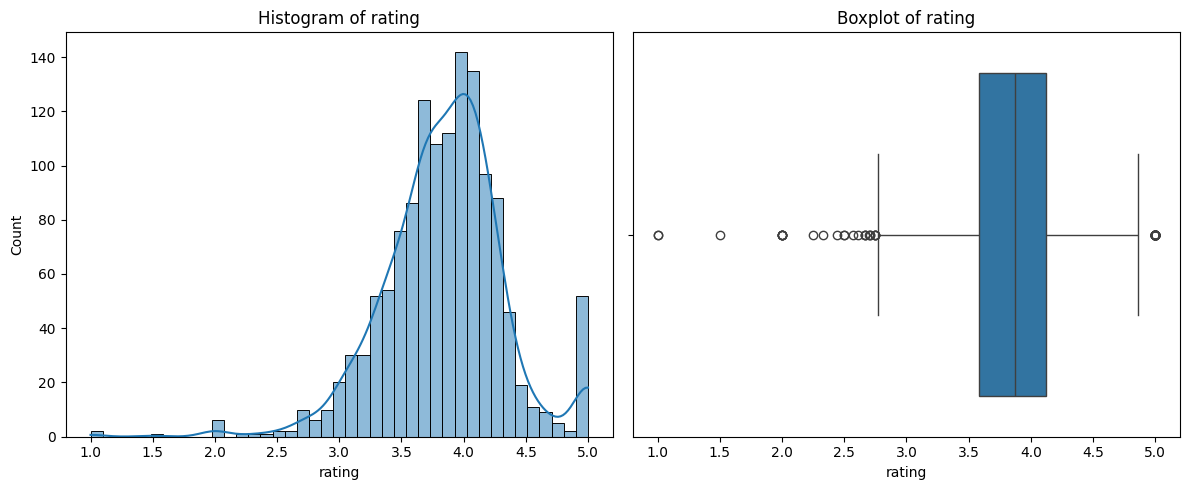

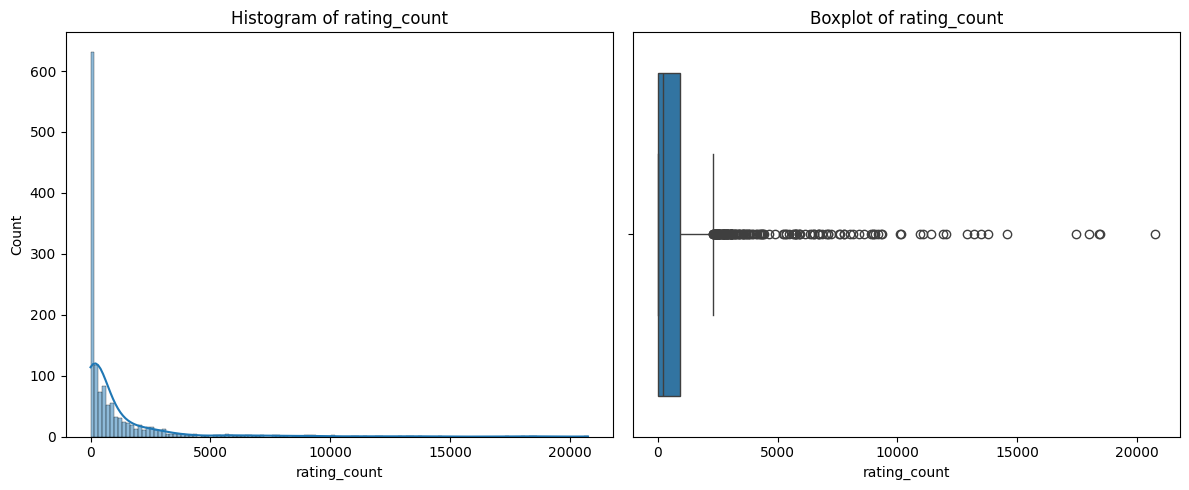

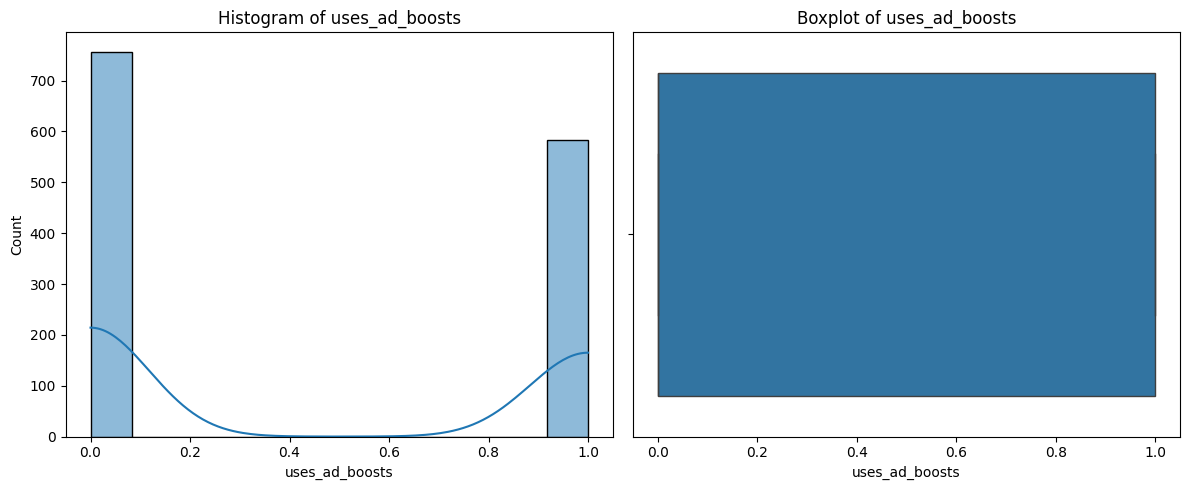

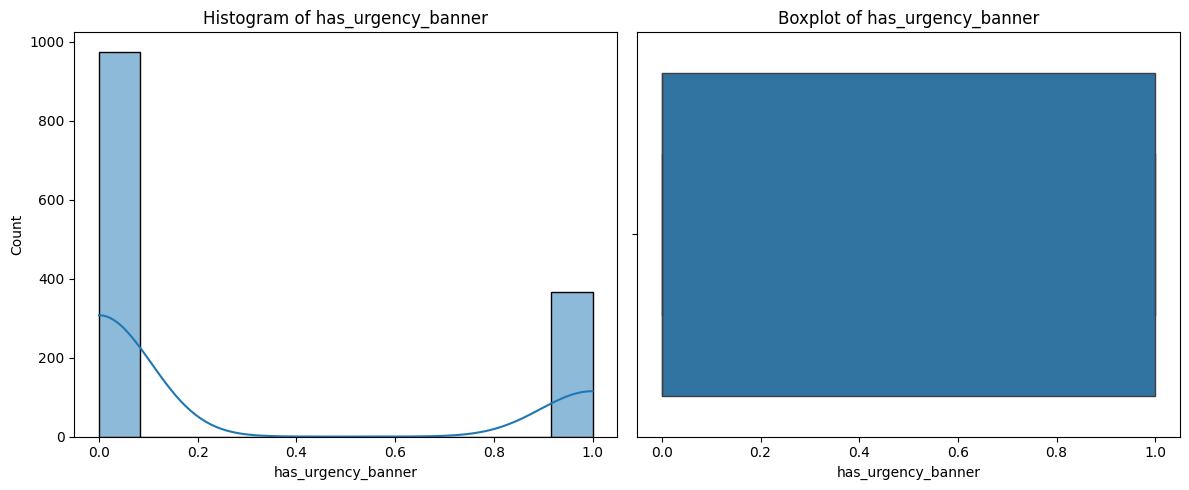

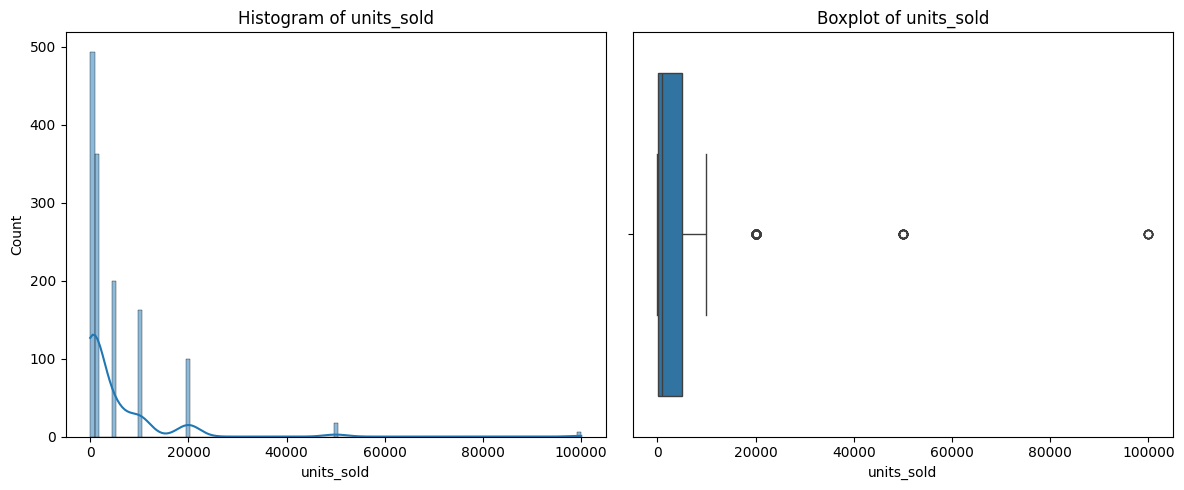

In [207]:
# Create histograms and boxplots for each variable
for column in preprocessed_data.columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(preprocessed_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=preprocessed_data[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

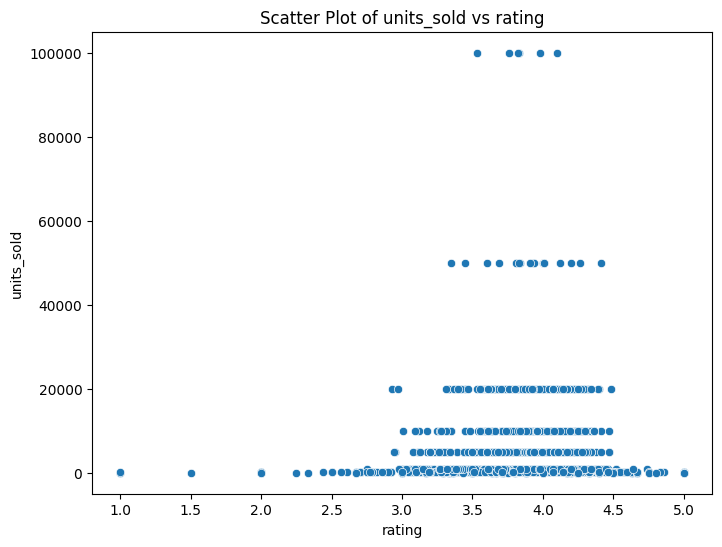

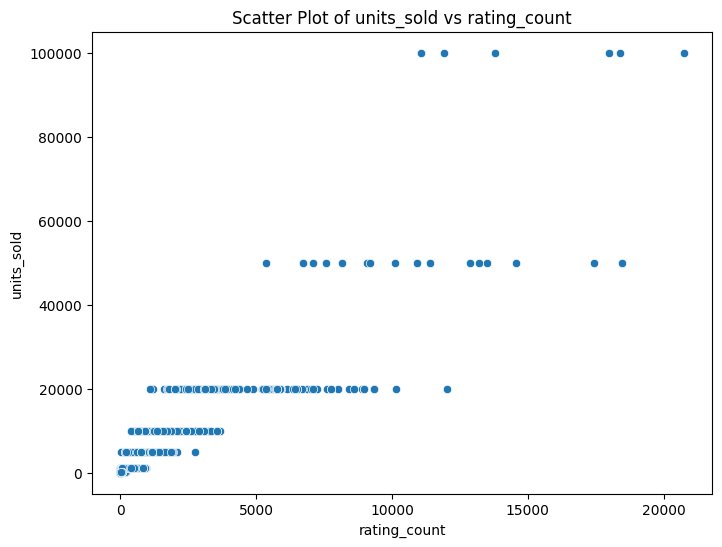

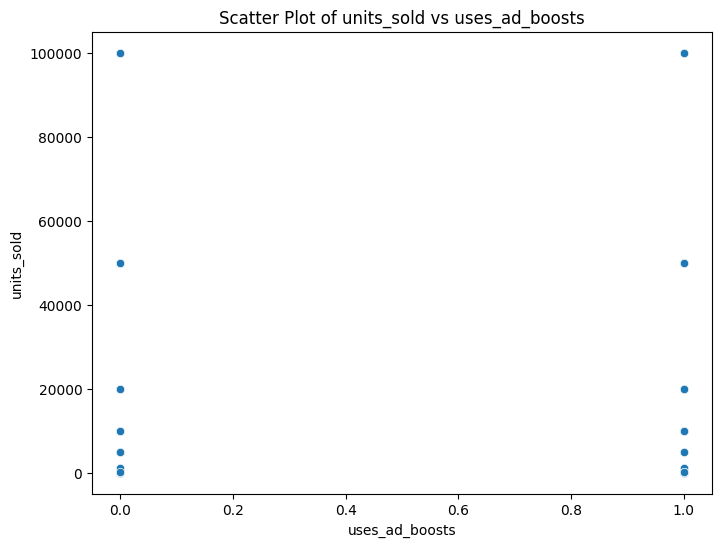

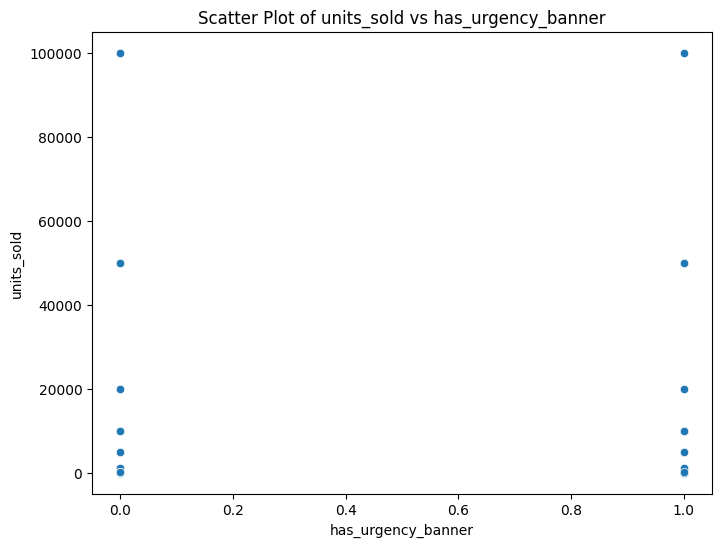

In [208]:
# Create scatter plots for each variable against units_sold
for column in preprocessed_data.columns:
    if column != 'units_sold':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=preprocessed_data[column], y=preprocessed_data['units_sold'])
        plt.title(f'Scatter Plot of units_sold vs {column}')
        plt.xlabel(column)
        plt.ylabel('units_sold')
        plt.show()

In [3]:
from causallearn.search.ConstraintBased.PC import pc

# default parameters
cg = pc(preprocessed_data.to_numpy())

Depth=1, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 2006.65it/s]


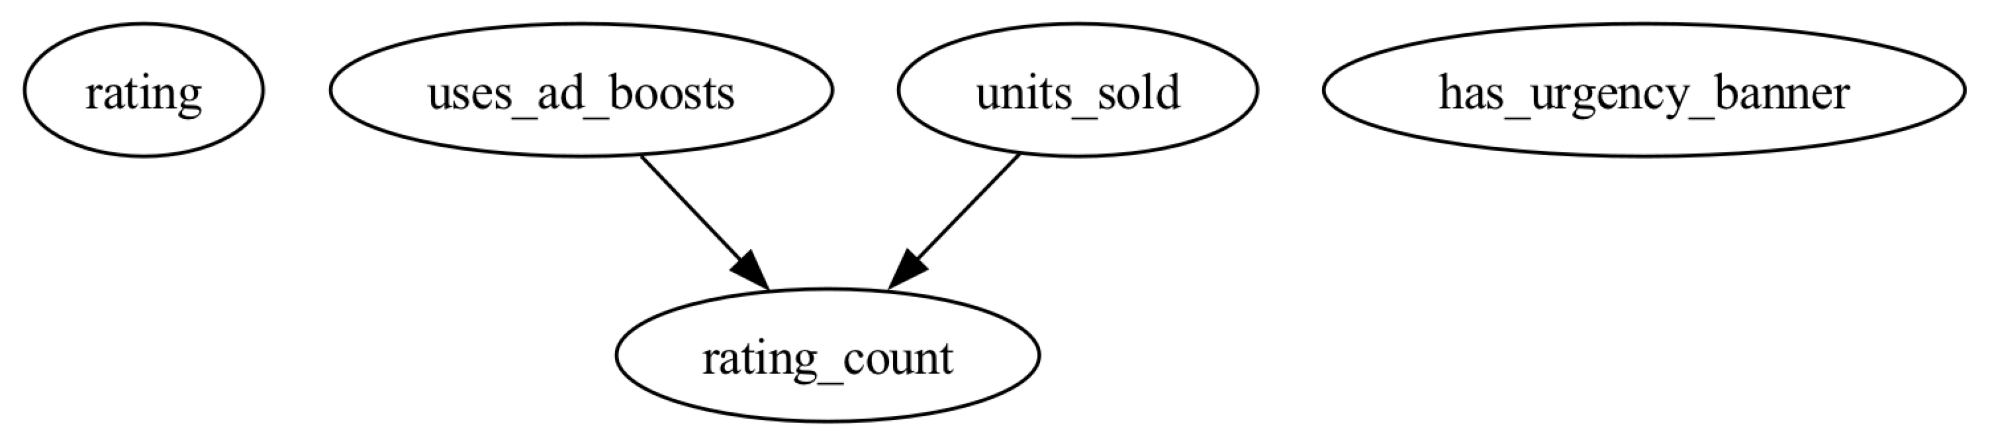

In [5]:
# visualization using pydot
cg.draw_pydot_graph(labels=preprocessed_data.columns)

# Data Dictionary

- 'title': Product Title in French
- 'title_orig': Product Title in English
- 'price': price to be paid by the customer to get the product (for 1000/1500 listings have price <= retail_price)
- 'retail_price': reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or the price before discount
- 'currency_buyer': EURO (since its French data)
- 'units_sold': total units of this product sold till date
- 'uses_ad_boosts': (binary) Whether the seller paid to boost his product within the platform
- 'rating': average rating of all reviews (i.e. derived from 5/4/3/2/1 star ratings columns below)
- 'rating_count': total ratings received from the customers for the product
- 'rating_five_count': count of 5 star ratings received
- 'rating_four_count': count of 4 star ratings received
- 'rating_three_count': count of 3 star ratings received
- 'rating_two_count': count of 2 star ratings received
- 'rating_one_count': count of 1 star ratings received
- 'badges_count': Number of badges the product or the seller have. [0,1,2,3] represents badges such as "Best Seller" or "Amazon's Choice" to improve product credibility
- 'badge_local_product': (binary) A badge that denotes the product is a local product. 
- 'badge_product_quality': (binary) Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge
- 'badge_fast_shipping': (binary) Badge awarded when this product's order is consistently shipped rapidly
- 'tags': keywords set by the seller for the product e.g. "Summer", "Cotton", "Shorts"
- 'product_color': main color of the product
- 'product_variation_size_id': size category e.g. Small, Medium, Large etc.
- 'product_variation_inventory': Inventory the seller has. Max allowed quantity is 50. 
- 'shipping_option_name': courier service used for shipment
- 'shipping_option_price': shipment price
- 'shipping_is_express': (binary) contains same info as 'badge_fast_shipping'
- 'countries_shipped_to': country for delivery address (some kind of numerical encoding used here)
- 'inventory_total': Total inventory for all the product's variations (size/color variations for instance)
- 'has_urgency_banner': (binary) whether product utilized/displayed urgency banner message
- 'urgency_text': ['Quantité limitée !' nan 'Réduction sur les achats en gros'] i.e. "Limited Quantity" and "Discount on bulk purchases" messages
- 'origin_country': name of the country of origin
- 'merchant_title': name of merchant
- 'merchant_name': exactly same info as 'merchant_title'
- 'merchant_info_subtitle': The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of % positive_feedbacks, rating_count, reviews written in french
- 'merchant_rating_count': count of merchant ratings
- 'merchant_rating': merchant average rating
- 'merchant_id': unique identifier of the merchant
- 'merchant_has_profile_picture': (binary)
- 'merchant_profile_picture': url to merchant's profile picture
- 'product_url': url to product description
- 'product_picture': url to product picture
- 'product_id': unique identifier for the product
- 'theme': the search term used in the search bar of the website to get these search results e.g. "summer" 
- 'crawl_month': single value for the whole column i.e. "2020-08"

# Columns dropped

- title: because it contains French description of the product
- title_orig: title in English but dont need it atm
- price: dont need it atm
- retail_price: dont need it atm
- currency_buyer: only contains 1 value i.e. Euro
- rating_five_count: because this info is already available in 'rating' and 'rating_count' cols
- rating_four_count: because this info is already available in 'rating' and 'rating_count' cols
- rating_three_count: because this info is already available in 'rating' and 'rating_count' cols
- rating_two_count: because this info is already available in 'rating' and 'rating_count' cols
- rating_one_count: because this info is already available in 'rating' and 'rating_count' cols
- badges_count: dont need it atm. contains only [0,1,2,3] 
- badge_local_product': dont need it atm. (binary)
- badge_product_quality': dont need it atm. (binary) 
- badge_fast_shipping': dont need it atm. (binary)
- tags: dont need it atm.
- product_color: dont need it atm.
- product_variation_size_id: dont need it atm.
- product_variation_inventory: dont need it atm.
- shipping_option_name: dont need it atm.
- shipping_option_price: dont need it atm.
- shipping_is_express: dont need it atm.
- countries_shipped_to: dont need it atm.
- inventory_total: dont need it atm.
- urgency_text: same info as 'has_urgency_banner'
- origin_country: dont need it atm.
- merchant_title: dont need it atm.
- merchant_name: dont need it atm.
- merchant_info_subtitle: dont need it atm.
- merchant_rating_count: dont need it atm.
- merchant_rating: dont need it atm.
- merchant_id: dont need it atm.
- merchant_has_profile_picture: (binary) dont need it atm.
- merchant_profile_picture: dont need it atm.
- product_url: dont need it atm.
- product_picture: dont need it atm.
- theme: because single value for the whole column i.e. "summer"
- crawl_month: because single value for the whole column i.e. "2020-08"

# Cleaning/Preprocessing
- has_urgency_banner: replace nan by 0
- urgency_text: replace nan by 0. 
    - **What to do with bulk purchase message?** Ans: Only one bulk message message in the data so ignore that row 
- product_id: only ~1300 values are unique. 
    - **merge the sales count for the duplicate ones?** Ans: No because it seems like all the duplicate rows contain exactly the same info i.e. rating, units_sold etc so just keep one of the duplicate rows and discard the others
- rating_count: **how to deal with ratings with very few ratings_count?** Ans: Leave it as it is for now.


# Causal Discovery
https://www.pywhy.org/dowhy/v0.10/example_notebooks/dowhy_causal_discovery_example.html

As we will see, causal discovery methods are not fool-proof and there is no guarantee that they will recover the correct causal graph. Even for the simple examples below, there is a large variance in results. These methods, however, may be combined usefully with domain knowledge to construct the final causal graph.

We do not know the true causal graph for the dataset and will use CDT to discover it. The causal graph obtained will then be used to estimate the causal effect.


In [1]:
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

In [2]:
# We define a utility function to draw the directed acyclic graph.
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d

def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

In [3]:
data_path = "./Wish Kaggle data/"
summer_products = pd.read_csv(data_path + "summer-products-with-rating-and-performance_2020-08.csv")
print(summer_products.shape)
summer_products.head()

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [6]:
single_value_cols = [c for c in summer_products.columns if len(summer_products[c].unique())==1]
print(single_value_cols)
for i in single_value_cols:
    print(summer_products[i].unique())

['currency_buyer', 'theme', 'crawl_month']
['EUR']
['summer']
['2020-08']


In [4]:
non_numerical_cols = summer_products.select_dtypes(include=['object'])
non_numerical_cols

,title,title_orig,currency_buyer,tags,product_color,product_variation_size_id,shipping_option_name,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,EUR,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),595097d6a26f6e070cb878d1,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,EUR,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",56458aa03a698c35c9050988,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,EUR,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,Livraison standard,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),5d464a1ffdf7bc44ee933c65,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,EUR,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,Livraison standard,NaN,CN,allenfan,allenfan,"(23,832 notes)",58cfdefdacb37b556efdff7c,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,EUR,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,Livraison standard,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",5ab3b592c3911a095ad5dadb,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,EUR,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,Livraison standard,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5b507899ab577736508a0782,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,EUR,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,Livraison standard,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",54d83b6b6b8a771e478558de,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,EUR,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,Livraison standard,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),5b42da1bf64320209fc8da69,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,EUR,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,Livraison standard,NaN,CN,modai,modai,77 % avis positifs (31 notes),5d56b32c40defd78043d5af9

In [5]:
non_numerical_cols_list = list(non_numerical_cols.columns)
non_numerical_cols_list.remove("product_id")
non_numerical_cols_list


['title',
 'title_orig',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'theme',
 'crawl_month']

In [6]:
summer_products.drop(columns=non_numerical_cols_list, inplace=True)
summer_products.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

In [7]:
summer_products.drop(columns=['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'], inplace=True)

In [41]:
summer_products.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_id
0,16.00,14,100,0,3.76,54,0,0,0,0,50,4,0,34,50,1.0,568,4.128521,0,5e9ae51d43d6a96e303acdb0
1,8.00,22,20000,1,3.45,6135,0,0,0,0,50,2,0,41,50,1.0,17752,3.899673,0,58940d436a0d3d5da4e95a38
2,8.00,43,100,0,3.57,14,0,0,0,0,1,3,0,36,50,1.0,295,3.989831,0,5ea10e2c617580260d55310a
3,8.00,8,5000,1,4.03,579,0,0,0,0,50,2,0,41,50,NaN,23832,4.020435,0,5cedf17ad1d44c52c59e4aca
4,2.72,3,100,1,3.10,20,0,0,0,0,1,1,0,35,50,1.0,14482,4.001588,0,5ebf5819ebac372b070b0e70


In [42]:
binary_cols = [col for col in summer_products.columns if len(summer_products[col].unique()) == 2]
binary_cols

['uses_ad_boosts',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_is_express',
 'has_urgency_banner',
 'merchant_has_profile_picture']

In [52]:
summer_products.isna().sum(axis=0)

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
product_variation_inventory        0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
product_id                         0
dtype: int64

In [53]:
summer_products['has_urgency_banner'].value_counts()

has_urgency_banner
1.0    473
Name: count, dtype: int64

In [8]:
summer_products['has_urgency_banner'] = summer_products['has_urgency_banner'].fillna(0)
summer_products.isna().sum(axis=0)

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
product_id                      0
dtype: int64

In [9]:
print(summer_products.shape)
summer_products.drop_duplicates(subset='product_id', keep='first', inplace=True)
print(summer_products.shape)

(1573, 20)
(1341, 20)


In [56]:
summer_products.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_id
0,16.00,14,100,0,3.76,54,0,0,0,0,50,4,0,34,50,1.0,568,4.128521,0,5e9ae51d43d6a96e303acdb0
1,8.00,22,20000,1,3.45,6135,0,0,0,0,50,2,0,41,50,1.0,17752,3.899673,0,58940d436a0d3d5da4e95a38
2,8.00,43,100,0,3.57,14,0,0,0,0,1,3,0,36,50,1.0,295,3.989831,0,5ea10e2c617580260d55310a
3,8.00,8,5000,1,4.03,579,0,0,0,0,50,2,0,41,50,0.0,23832,4.020435,0,5cedf17ad1d44c52c59e4aca
4,2.72,3,100,1,3.10,20,0,0,0,0,1,1,0,35,50,1.0,14482,4.001588,0,5ebf5819ebac372b070b0e70


In [10]:
summer_products.drop(columns=["product_id"], inplace=True)

We use the CDT library to perform causal discovery on the Auto-MPG dataset. We use three methods for causal discovery here -LiNGAM, PC and GES. These methods are widely used and do not take much time to run. Hence, these are ideal for an introduction to the topic. Other neural network based methods are also available in CDT and the users are encouraged to try them out by themselves.

In [12]:
from cdt.causality.graph import LiNGAM, PC, GES

graphs = {}
labels = [f'{col}' for i, col in enumerate(summer_products.columns)]
functions = {
    # 'LiNGAM' : LiNGAM,
    'PC' : PC,
    'GES' : GES,
}

for method, lib in functions.items():
    obj = lib()
    output = obj.predict(summer_products)
    adj_matrix = nx.to_numpy_array(output)
    adj_matrix = np.asarray(adj_matrix)
    graph_dot = make_graph(adj_matrix, labels)
    graphs[method] = graph_dot

# Visualize graphs
for method, graph in graphs.items():
    print("Method : %s"%(method))
    display(graph)

ImportError: R Package (k)pcalg/RCIT is not available. RCIT has to be installed from https://github.com/Diviyan-Kalainathan/RCIT

Kaggle link
https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish/data?select=summer-products-with-rating-and-performance_2020-08.csv
- the products listed in the dataset are those that would appear if you type "summer" in the search field of the platform.
- The data was scraped with french as settings (hence the presence of some non-ascii latin characters such as « é » and « à ») in the title column.
- August 2020 data only
- Data shape: 1573, 43


Wish platform link
https://www.wish.com/
- Criticism section on Wikipedia is interesting
- website does not have concept of categories (e.g. Electronics, Home, Clothing etc), instead it returns results based on keyword search e.g. "summer"
